In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

import warnings

warnings.filterwarnings("ignore")

pd.set_option("mode.copy_on_write", True)

In [171]:
nhis = pd.read_csv("nhis_00002.csv")

nhis.head()

,YEAR,SERIAL,STRATA,PSU,NHISHID,HHWEIGHT,REGION,PERNUM,NHISPID,HHX,...,SMKECIGRND,CIGAREV,CIGARDAYSMO,CIGAR50LIFE,CIGARFREQNOW,PIPEV,PIPEFREQNOW,NONCIGEV,NONCIGNOW,TOBLSYR
0,2000,1,5061,1,2000000001,2944.0,1,1,20000000010101,1,...,NaN,0.0,96.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2000,1,5061,1,2000000001,2944.0,1,2,20000000010102,1,...,NaN,1.0,96.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN
2,2000,1,5061,1,2000000001,2944.0,1,3,20000000010103,1,...,NaN,0.0,96.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,2000,1,5061,1,2000000001,2944.0,1,4,20000000010104,1,...,NaN,0.0,96.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2000,1,5061,1,2000000001,2944.0,1,5,20000000010105,1,...,NaN,0.0,96.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [172]:
# unique value in column 'year'
nhis["YEAR"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [173]:
# shape of the dataset
nhis.shape

(1914065, 60)

In [174]:
# subset nhis_new to only includes CNLUNG, SEX, RACENEW, CNLUNGAG, POORYN, USUALPL, HINOTCOVE
nhis_new = nhis[
    [
        "NHISHID",
        "NHISPID",
        "YEAR",
        "CNLUNG",
        "SEX",
        "RACENEW",
        "CNLUNGAG",
        "POORYN",
        "USUALPL",
        "HINOTCOVE",
    ]
]

nhis_new.head()

,NHISHID,NHISPID,YEAR,CNLUNG,SEX,RACENEW,CNLUNGAG,POORYN,USUALPL,HINOTCOVE
0,2000000001,20000000010101,2000,0,1,100,96,1.0,0,1
1,2000000001,20000000010102,2000,0,2,100,96,1.0,2,1
2,2000000001,20000000010103,2000,0,2,100,96,1.0,0,1
3,2000000001,20000000010104,2000,0,1,100,96,1.0,0,1
4,2000000001,20000000010105,2000,0,1,100,96,1.0,2,1


Ever had cancer: Lung

CNLUNG identifies sample adults who had ever been told that they had lung cancer. Those sample adults who reported ever being told by a doctor or other health professional that they had cancer or a malignancy of any kind (CANCEREV) were asked the follow-up question, "What kind of cancer was it?

0 NIU

1 Not mentioned

2 Mentioned

7 Unknown-refused

8 Unknown-not ascertained

9 Unknown-don't know

In [175]:
nhis_new["CNLUNG"].unique()

array([0, 1, 2, 9, 7])

In [176]:
number_no_cancer = nhis_new[nhis_new["CNLUNG"] == 1].shape[0]
number_cancer = nhis_new[nhis_new["CNLUNG"] == 2].shape[0]
print("Number without cancer:", number_no_cancer)
print("Number with cancer:", number_cancer)

Number without cancer: 61839
Number with cancer: 2049


In [177]:
nhis_new["CNLUNG"].value_counts()

CNLUNG
0    1849834
1      61839
2       2049
9        238
7        105
Name: count, dtype: int64

In [178]:
# find the unique years of the column "CNLUNG"
filtered_nhis_new = nhis_new[pd.notnull(nhis_new["CNLUNG"])]
unique_years = filtered_nhis_new["YEAR"].unique()
print(unique_years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]


Number of people who has lung cancer over the years 

In [179]:
# Filtering the dataset for rows where CNLUNG equals 2 (lung cancer)
lung_cancer = nhis_new[nhis_new["CNLUNG"] == 2]

# Counting the number of people with lung cancer per year
lung_cancer_counts_per_year = lung_cancer.groupby("YEAR").size()

lung_cancer_counts_per_year

YEAR
2000     50
2001     76
2002     82
2003     89
2004     75
2005     69
2006     60
2007     70
2008     50
2009     79
2010     67
2011     88
2012     66
2013    113
2014    113
2015    110
2016    129
2017     97
2018     92
2019    112
2020    131
2021    115
2022    116
dtype: int64

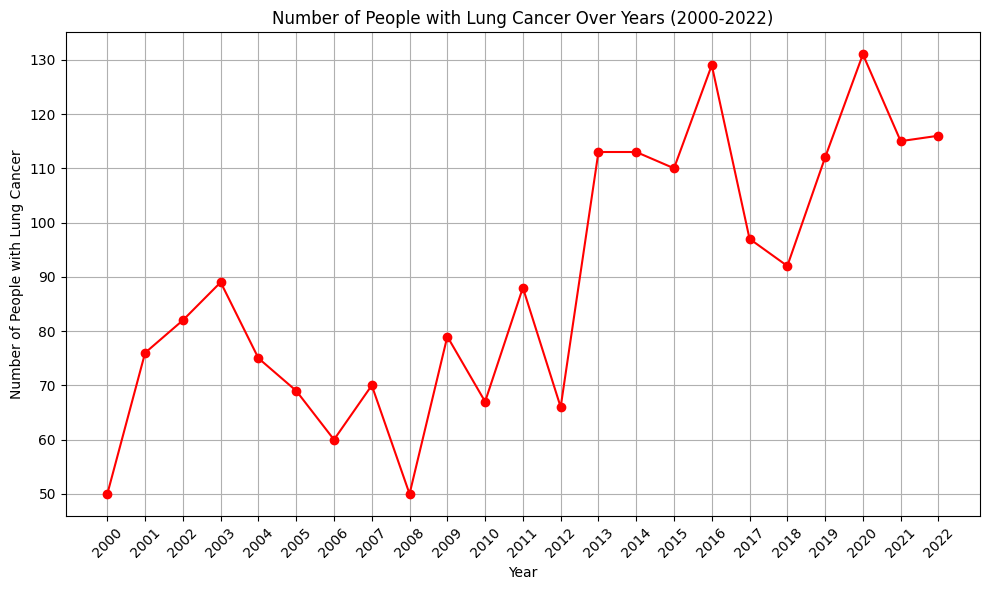

In [180]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(
    lung_cancer_counts_per_year.index,
    lung_cancer_counts_per_year.values,
    marker="o",
    linestyle="-",
    color="red",
)
plt.title("Number of People with Lung Cancer Over Years (2000-2022)")
plt.xlabel("Year")
plt.ylabel("Number of People with Lung Cancer")
plt.grid(True)
plt.xticks(np.arange(2000, 2023), rotation=45)
plt.tight_layout()
plt.show()

Proportion of people who has lung cancer out of the known lung cancer status in the survey for each unique year

In [181]:
# calculate the proportion of people who has lung cancer out of the known cancer status in the survey for each unique year
# Counting total number of poeple who is known to have lung cancer and who is not known to have lung cancer per year
lung_cancer_status = nhis_new[nhis_new["CNLUNG"].isin([1, 2])]

total_lung_cancer_status_counts_per_year = lung_cancer_status.groupby("YEAR").size()

# Calculating the proportion of lung cancer cases per year
proportion_lung_cancer_per_year = (
    lung_cancer_counts_per_year / total_lung_cancer_status_counts_per_year
)

proportion_lung_cancer_per_year

YEAR
2000    0.023288
2001    0.032858
2002    0.036493
2003    0.041843
2004    0.032383
2005    0.028619
2006    0.034783
2007    0.039503
2008    0.027086
2009    0.034363
2010    0.028929
2011    0.030834
2012    0.021249
2013    0.036712
2014    0.032964
2015    0.033526
2016    0.035112
2017    0.031762
2018    0.031431
2019    0.029342
2020    0.031881
2021    0.031672
2022    0.034018
dtype: float64

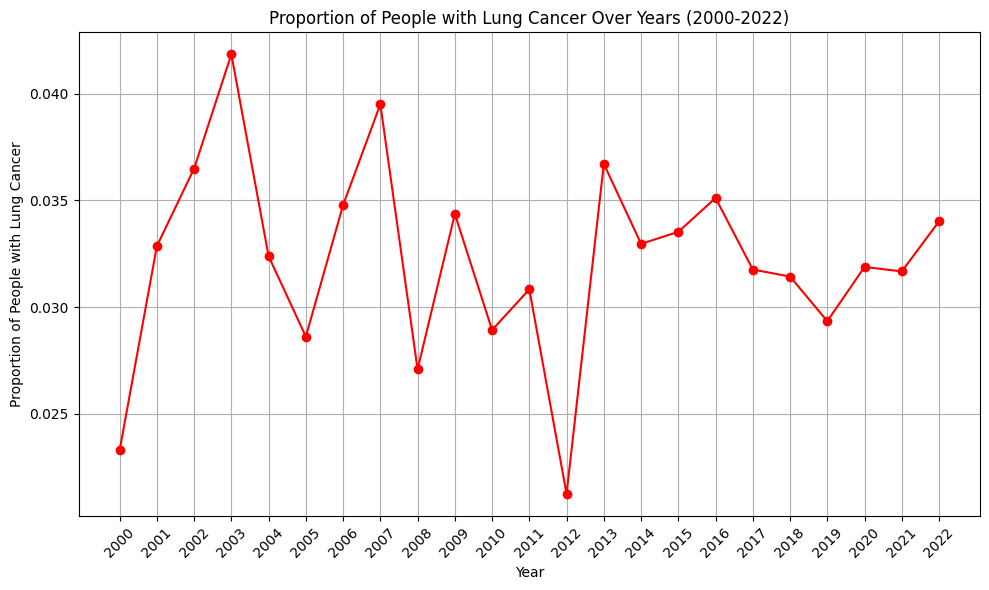

In [182]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(
    proportion_lung_cancer_per_year.index,
    proportion_lung_cancer_per_year.values,
    marker="o",
    linestyle="-",
    color="red",
)
plt.title("Proportion of People with Lung Cancer Over Years (2000-2022)")
plt.xlabel("Year")
plt.ylabel("Proportion of People with Lung Cancer")
plt.grid(True)
plt.xticks(np.arange(2000, 2023), rotation=45)
plt.tight_layout()
plt.show()

SEX

SEX indicates whether the person was male or female.
Starting in 2019, "Unknown-refused" and "Unknown-don't know" responses are allowed. Prior to 2019, SEX is not coded as "unknown" for any persons included in the IPUMS NHIS data.
According to the 2020 Survey Description, for some variables, including SEX, the 2020 responses of sample adults that were part of the 2020 longitudinal sample were overwritten with their 2019 responses "to mitigate
disclosure risks associated with differences in response from repeated measures among the same Sample Adults" (33). The sample adults' actual 2020 responses can be accessed through a Research Data Center (RDC). For more information on the 2020 longitudinal sample, please see SALNGPRTFLG

1-Male

2-Female

7-Unknown-refused

8-Unknown-not ascertained

9-Unknown-don't know

In [183]:
# find the unique years of the column "SEX"
filtered_nhis_new = nhis_new[pd.notnull(nhis_new["SEX"])]
unique_years = filtered_nhis_new["YEAR"].unique()
print(unique_years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [184]:
nhis_new["SEX"].unique()

array([1, 2, 7, 9])

In [185]:
# unique sex for people with known cancer status in the survey
unique_sexes_cancer_status = nhis_new.loc[
    nhis_new["CNLUNG"].isin([1, 2]), "SEX"
].unique()

unique_sexes_cancer_status

array([2, 1])

In [186]:
# find the unique years of the column "SEX"
filtered_nhis_new = nhis_new[pd.notnull(nhis_new["SEX"])]
unique_years = filtered_nhis_new["YEAR"].unique()
print(unique_years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]


Proportion of People with Lung Cancer by Sex Over Years (2000-2022)

In [187]:
# Calculating the proportion of lung cancer cases by sex for each year
proportion_by_sex_year = (
    lung_cancer_status.groupby(["YEAR", "SEX"])["CNLUNG"]
    .apply(lambda x: (x == 2).mean())
    .unstack()
)

proportion_by_sex_year

SEX,1,2
YEAR,,
2000,0.029563,0.019722
2001,0.056497,0.018207
2002,0.046223,0.030147
2003,0.051833,0.035928
2004,0.042082,0.026185
2005,0.038136,0.022495
2006,0.039394,0.031925
2007,0.051136,0.031835
2008,0.029052,0.026007


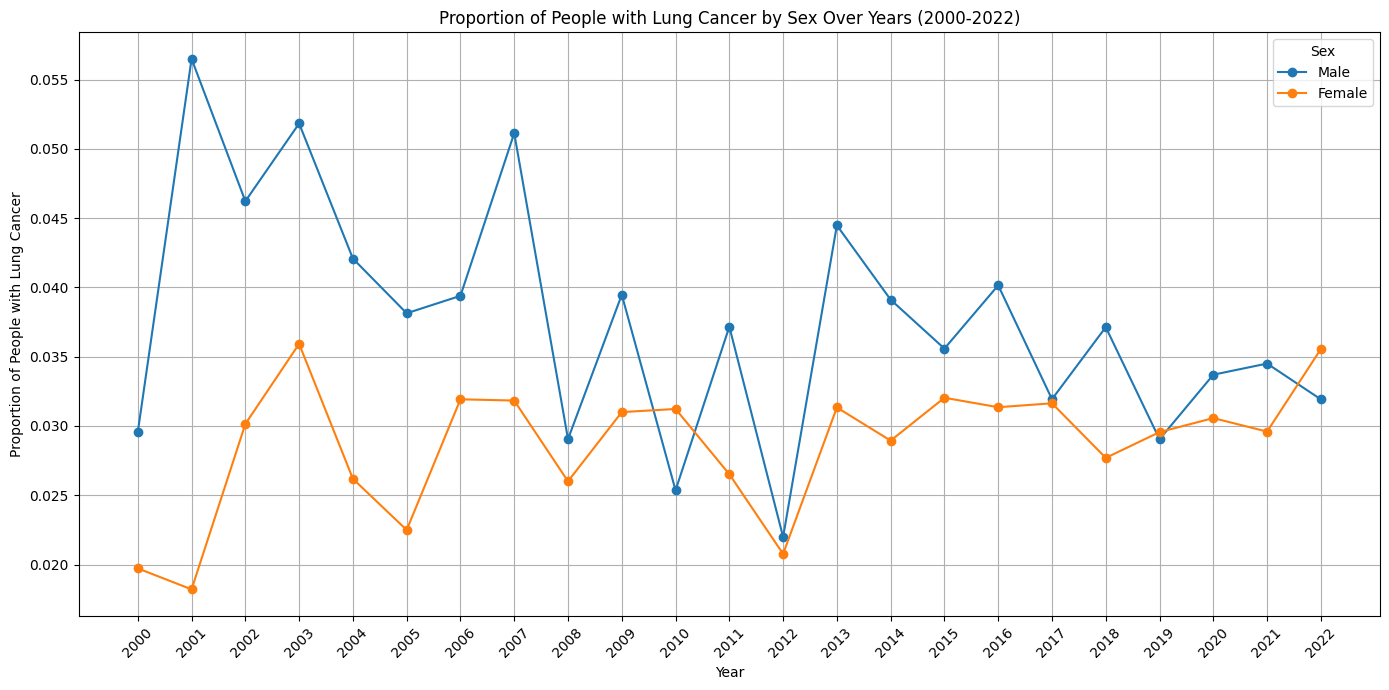

In [188]:
# Plotting
plt.figure(figsize=(14, 7))
sex_labels = {1: "Male", 2: "Female"}

for sex in proportion_by_sex_year.columns:
    label = sex_labels.get(sex)
    plt.plot(
        proportion_by_sex_year.index,
        proportion_by_sex_year[sex],
        marker="o",
        linestyle="-",
        label=label,
    )

plt.title("Proportion of People with Lung Cancer by Sex Over Years (2000-2022)")
plt.xlabel("Year")
plt.ylabel("Proportion of People with Lung Cancer")
plt.legend(title="Sex")
plt.grid(True)
plt.xticks(np.arange(2000, 2023), rotation=45)
plt.tight_layout()
plt.show()

Number of Lung Cancer Cases Each Year by Sex

In [189]:
# Count the number of lung cancer cases by YEAR and SEX
lung_cancer_count_by_year_sex = (
    lung_cancer.groupby(["YEAR", "SEX"]).size().unstack(fill_value=0)
)

lung_cancer_count_by_year_sex

SEX,1,2
YEAR,,
2000,23,27
2001,50,26
2002,41,41
2003,41,48
2004,38,37
2005,36,33
2006,26,34
2007,36,34
2008,19,31


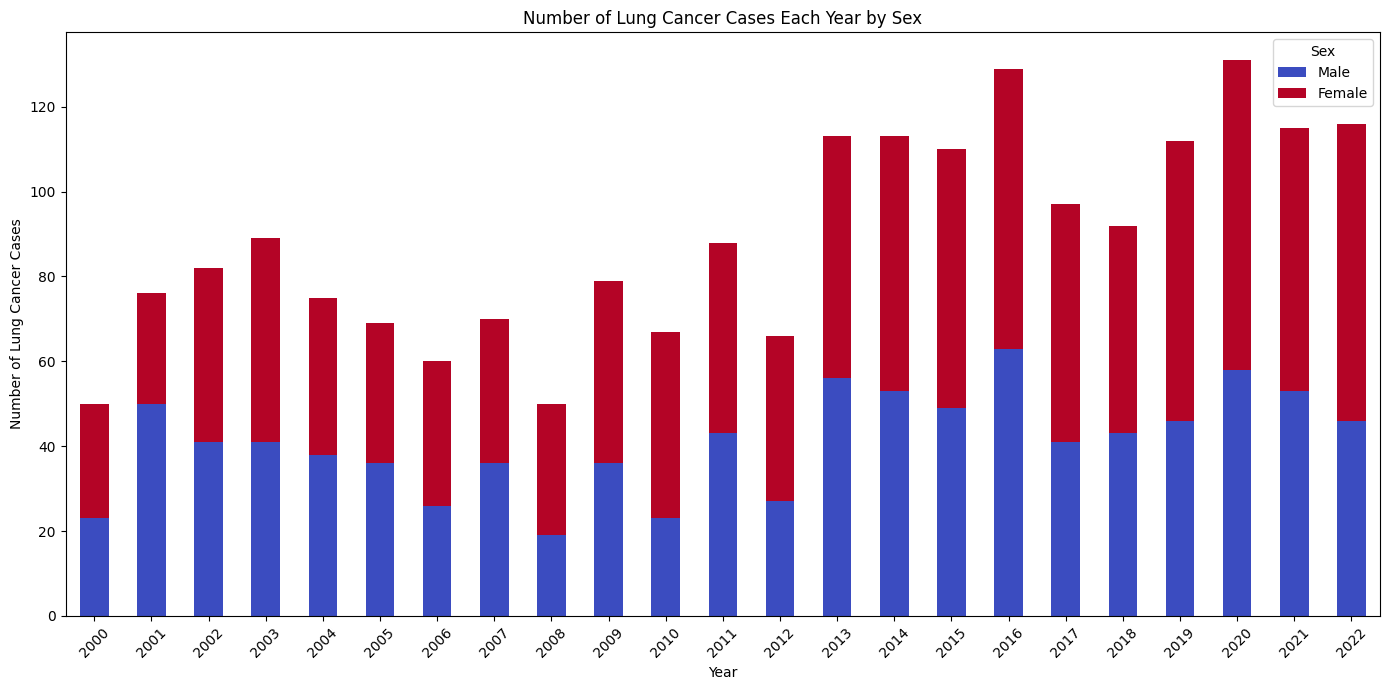

In [190]:
# Plotting
lung_cancer_count_by_year_sex.plot(
    kind="bar", stacked=True, figsize=(14, 7), colormap="coolwarm"
)
plt.title("Number of Lung Cancer Cases Each Year by Sex")
plt.xlabel("Year")
plt.ylabel("Number of Lung Cancer Cases")
plt.legend(title="Sex", labels=["Male", "Female"])  # Assuming 1 is Male, 2 is Female
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Race

Self-reported Race (Post-1997 OMB standards)

RACENEW provides information on self-reported race of sample adults and sample children (and prior to 2019, all persons), using the October 30, 1997 revision of Statistical Policy Directive No. 15, Race and Ethnic Standards for Federal Statistics and Administrative Reporting.

100 White only

200 Black/African American only

300 American Indian/Alaska Native only

400 Asian only

500 Other Race and Multiple Race

510 Other Race and Multiple Race (2019-forward: Excluding American Indian/Alaska Native)

520 Other Race

530 Race Group Not Releasable

540 Multiple Race

541 Multiple Race (1999-2018: Including American Indian/Alaska Native)

542 American Indian/Alaska Native and Any Other Race

997 Unknown-Refused

998 Unknown-Not ascertained

999 Unknown-Don't Know

In [191]:
# find the unique years of the column "RACENEW"
filtered_nhis_new = nhis_new[pd.notnull(nhis_new["RACENEW"])]
unique_years = filtered_nhis_new["YEAR"].unique()
print(unique_years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [192]:
nhis_new["RACENEW"].unique()

array([100, 200, 400, 541, 520, 300, 530, 510, 998, 542, 999, 997])

In [193]:
# unique sex for people with known cancer status in the survey
unique_race_cancer_status = nhis_new.loc[
    nhis_new["CNLUNG"].isin([1, 2]), "RACENEW"
].unique()

unique_race_cancer_status

array([100, 200, 520, 541, 300, 400, 530, 998, 542, 510, 997, 999])

Proportion of People with Lung Cancer by Race Over Years (2000-2022)

In [194]:
# Calculating the proportion of lung cancer cases by race for each year
proportion_by_race_year = (
    lung_cancer_status.groupby(["YEAR", "RACENEW"])["CNLUNG"]
    .apply(lambda x: (x == 2).mean())
    .unstack()
)

proportion_by_race_year

RACENEW,100,200,300,400,510,520,530,541,542,997,998,999
YEAR,,,,,,,,,,,,
2000,0.021796,0.032895,0.083333,0.100000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
2001,0.030564,0.071429,0.000000,0.000000,NaN,0.000000,NaN,0.047619,NaN,NaN,NaN,NaN
2002,0.036382,0.037594,0.090909,0.000000,NaN,0.086957,NaN,0.000000,NaN,NaN,NaN,NaN
2003,0.039083,0.075949,0.000000,0.034483,NaN,NaN,0.0,0.090909,NaN,NaN,NaN,NaN
2004,0.033702,0.027778,0.000000,0.000000,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
2005,0.029086,0.034091,0.000000,0.000000,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
2006,0.034159,0.045455,0.100000,0.025000,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
2007,0.039279,0.043750,0.000000,0.027778,NaN,NaN,0.0,0.066667,NaN,NaN,NaN,NaN
2008,0.023139,0.060976,0.000000,0.071429,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN


In [195]:
# Subsetting to include only races 100, 200, 300, and 400
subset_proportion_by_race_year = proportion_by_race_year[[100, 200, 300, 400]]

subset_proportion_by_race_year

RACENEW,100,200,300,400
YEAR,,,,
2000,0.021796,0.032895,0.083333,0.100000
2001,0.030564,0.071429,0.000000,0.000000
2002,0.036382,0.037594,0.090909,0.000000
2003,0.039083,0.075949,0.000000,0.034483
2004,0.033702,0.027778,0.000000,0.000000
2005,0.029086,0.034091,0.000000,0.000000
2006,0.034159,0.045455,0.100000,0.025000
2007,0.039279,0.043750,0.000000,0.027778
2008,0.023139,0.060976,0.000000,0.071429


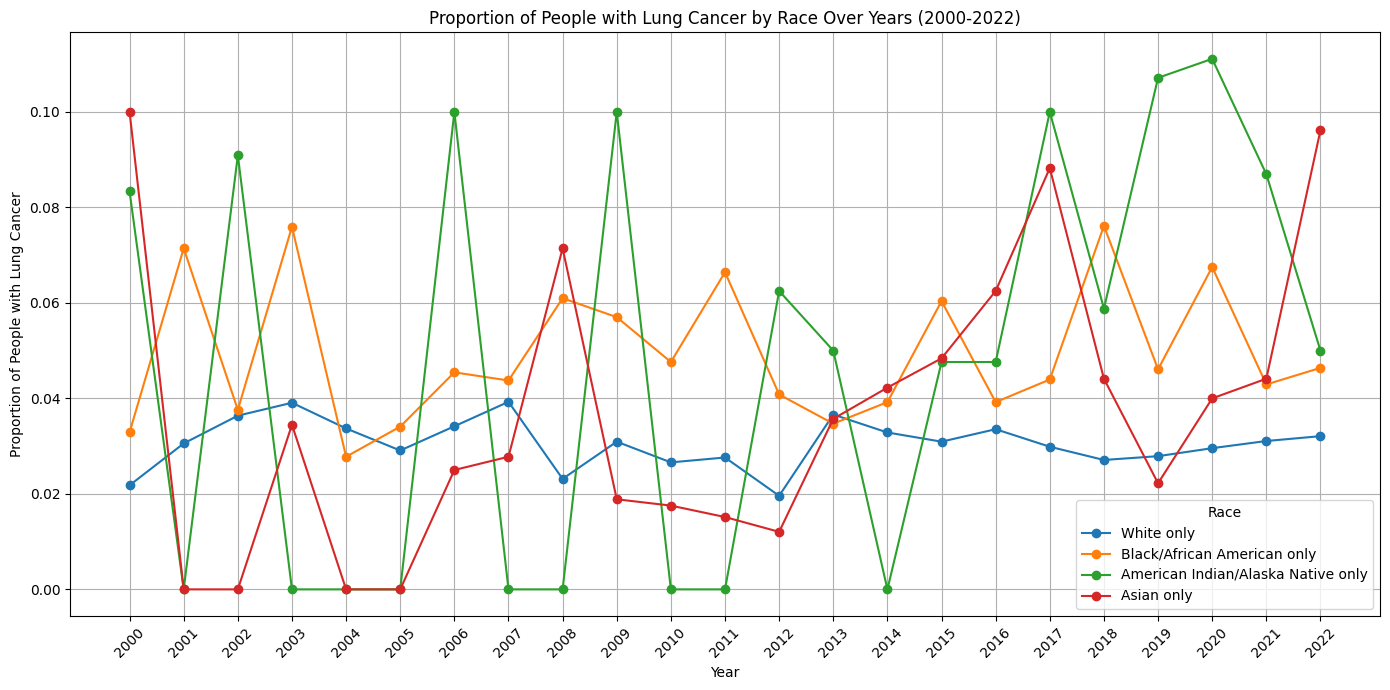

In [196]:
# Plotting
plt.figure(figsize=(14, 7))
race_labels = {
    100: "White only",
    200: "Black/African American only",
    300: "American Indian/Alaska Native only",
    400: "Asian only",
}

for race in subset_proportion_by_race_year.columns:
    label = race_labels.get(race)
    plt.plot(
        subset_proportion_by_race_year.index,
        subset_proportion_by_race_year[race],
        marker="o",
        linestyle="-",
        label=label,
    )

plt.title("Proportion of People with Lung Cancer by Race Over Years (2000-2022)")
plt.xlabel("Year")
plt.ylabel("Proportion of People with Lung Cancer")
plt.legend(title="Race")
plt.grid(True)
plt.xticks(np.arange(2000, 2023), rotation=45)
plt.tight_layout()
plt.show()

Number of Lung Cancer Cases Each Year by Race (2000-2022)

In [197]:
# Count the number of lung cancer cases by YEAR and RACE
lung_cancer_count_by_year_race = (
    lung_cancer.groupby(["YEAR", "RACENEW"]).size().unstack(fill_value=0)
)

lung_cancer_count_by_year_race

RACENEW,100,200,300,400,510,520,541,542,998
YEAR,,,,,,,,,
2000,42,5,1,2,0,0,0,0,0
2001,64,11,0,0,0,0,1,0,0
2002,74,5,1,0,0,2,0,0,0
2003,75,12,0,1,0,0,1,0,0
2004,70,5,0,0,0,0,0,0,0
2005,63,6,0,0,0,0,0,0,0
2006,51,7,1,1,0,0,0,0,0
2007,61,7,0,1,0,0,1,0,0
2008,37,10,0,3,0,0,0,0,0


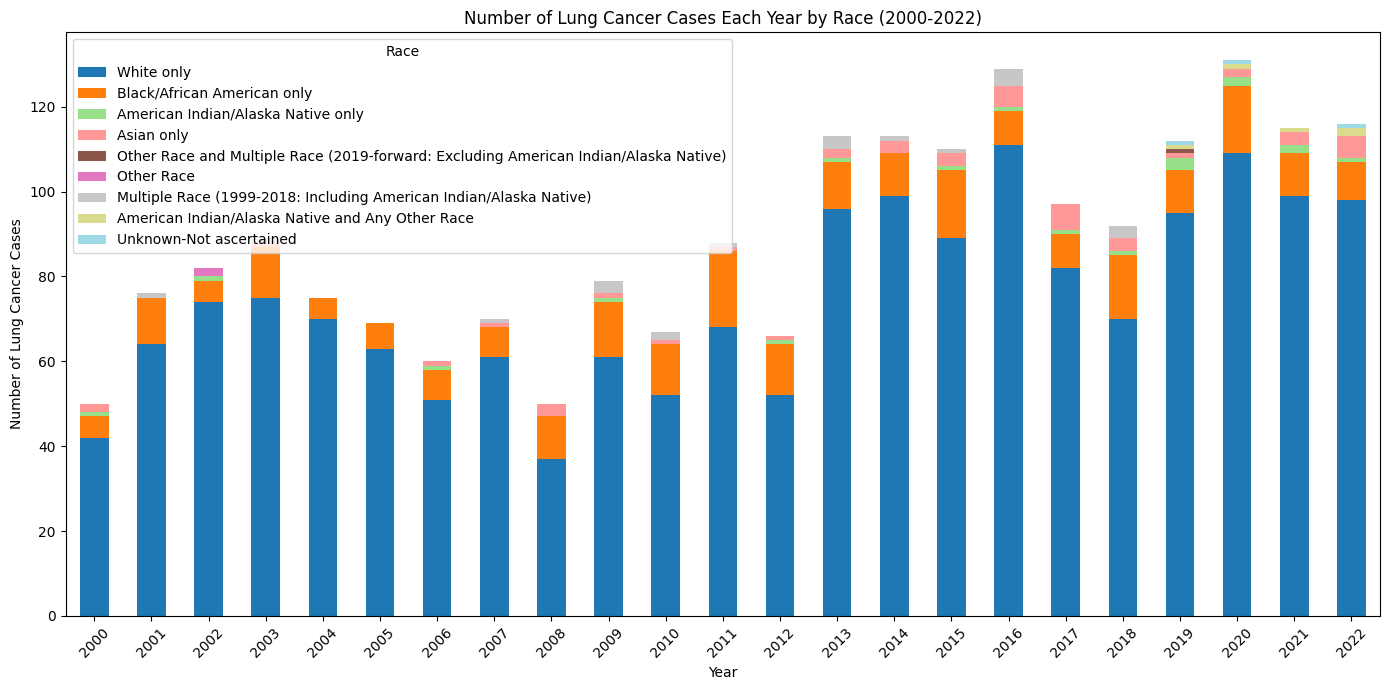

In [198]:
# Custom legend labels
race_labels = {
    100: "White only",
    200: "Black/African American only",
    300: "American Indian/Alaska Native only",
    400: "Asian only",
    500: "Other Race and Multiple Race",
    510: "Other Race and Multiple Race (2019-forward: Excluding American Indian/Alaska Native)",
    520: "Other Race",
    530: "Race Group Not Releasable",
    540: "Multiple Race",
    541: "Multiple Race (1999-2018: Including American Indian/Alaska Native)",
    542: "American Indian/Alaska Native and Any Other Race",
    997: "Unknown-Refused",
    998: "Unknown-Not ascertained",
    999: "Unknown-Don't Know",
}

# Plotting
lung_cancer_count_by_year_race.plot(
    kind="bar", stacked=True, figsize=(14, 7), colormap="tab20"
)

plt.title("Number of Lung Cancer Cases Each Year by Race (2000-2022)")
plt.xlabel("Year")
plt.ylabel("Number of Lung Cancer Cases")

# legend labels
plt.legend(
    [
        race_labels.get(int(x), f"Race {x}")
        for x in lung_cancer_count_by_year_race.columns
    ],
    title="Race",
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Age first diagnosed with lung cancer

00 0 Years
01 1 Year
02 2 Years
03 3 Years
04 4 Years
05 5 Years
06 6 Years
07 7 Years
08 8 Years
09 9 Years
10 10 Years
11 11 Years
12 12 Years
13 13 Years
14 14 Years
15 15 Years
16 16 Years
17 17 Years
18 18 Years
19 19 Years
20 20 Years
21 21 Years
22 22 Years
23 23 Years
24 24 Years
25 25 Years
26 26 Years
27 27 Years
28 28 Years
29 29 Years
30 30 Years
31 31 Years
32 32 Years
33 33 Years
34 34 Years
35 35 Years
36 36 Years
37 37 Years
38 38 Years
39 39 Years
40 40 Years
41 41 Years
42 42 Years
43 43 Years
44 44 Years
45 45 Years
46 46 Years
47 47 Years
48 48 Years
49 49 Years
50 50 Years
51 51 Years
52 52 Years
53 53 Years
54 54 Years
55 55 Years
56 56 Years
57 57 Years
58 58 Years
59 59 Years
60 60 Years
61 61 Years
62 62 Years
63 63 Years
64 64 Years
65 65 Years
66 66 Years
67 67 Years
68 68 Years
69 69 Years
70 70 Years
71 71 Years
72 72 Years
73 73 Years
74 74 Years
75 75 Years
76 76 Years
77 77 Years
78 78 Years
79 79 Years
80 80 Years
81 81 Years
82 82 Years
83 83 Years
84 84 Years

85 - 85+ Years

96 - NIU

97 - Unknown-refused

98 - Unknown-not ascertained

99 - Unknown-don't know

In [199]:
# find the unique years of the column "CNLUNGAG"
filtered_nhis_new = nhis_new[pd.notnull(nhis_new["CNLUNGAG"])]
unique_years = filtered_nhis_new["YEAR"].unique()
print(unique_years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [200]:
nhis_new["CNLUNGAG"].unique()

array([96, 30, 60, 56, 55, 67, 66, 51, 68, 73, 77, 47, 74, 70, 71, 69, 84,
       39, 75, 59, 65, 46, 61, 45, 31,  3, 85, 78, 62, 81, 79, 64, 25, 52,
       54, 43, 58, 76, 72, 42, 63, 82, 44, 17, 49, 50, 35, 53, 48,  2, 57,
       34, 36, 23, 83, 80,  9, 40, 99, 21, 28, 41, 37, 38, 18, 24, 33, 97,
       10, 27, 32, 22, 20, 29, 14, 13, 26,  4,  7,  1, 15, 16, 12,  6,  5])

In [201]:
# replace 96 - NIU, 97 - Unknown-refused, 98 - Unknown-not ascertained, 99 - Unknown-don't know to be nan
nhis_new["CNLUNGAG"] = nhis_new["CNLUNGAG"].replace([96, 97, 98, 99], np.nan)

contains_original_values = nhis_new["CNLUNGAG"].isin([96, 97, 98, 99]).any()

# Printing the check (False means replacement was successful and those values are not present)
print(contains_original_values)

False


Most frequent age of being diagnosed with lung cancer over the year 2000-2022 

In [202]:
# Finding the most frequent age of diagnosis for each year
most_frequent_age_cancer_per_year = lung_cancer.groupby("YEAR")["CNLUNGAG"].agg(
    lambda x: mode(x)[0]
)

most_frequent_age_cancer_per_year

YEAR
2000    55
2001    70
2002    70
2003    60
2004    65
2005    60
2006    67
2007    52
2008    79
2009    65
2010    49
2011    65
2012    60
2013    68
2014    70
2015    65
2016    60
2017    70
2018    77
2019    60
2020    67
2021    67
2022    64
Name: CNLUNGAG, dtype: int64

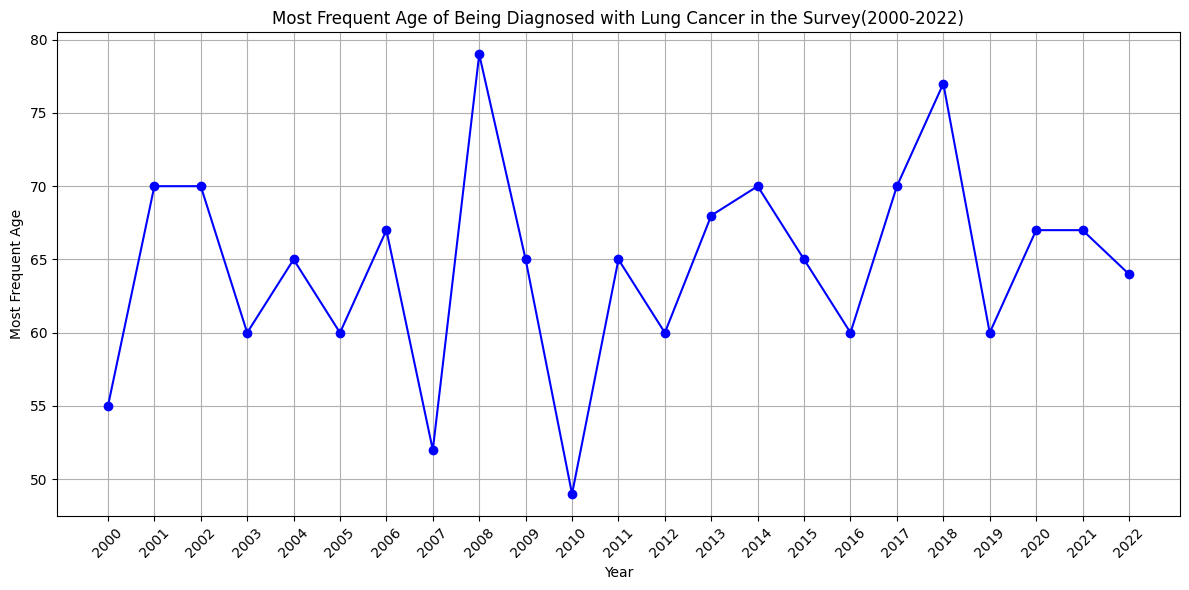

In [203]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(
    most_frequent_age_cancer_per_year.index,
    most_frequent_age_cancer_per_year,
    marker="o",
    linestyle="-",
    color="blue",
)
plt.title(
    "Most Frequent Age of Being Diagnosed with Lung Cancer in the Survey(2000-2022)"
)
plt.xlabel("Year")
plt.ylabel("Most Frequent Age")
plt.grid(True)
plt.xticks(np.arange(2000, 2023), rotation=45)
plt.tight_layout()
plt.show()

Average age of being diagnosed with lung cancer over the year 2000-2022 

In [204]:
# Calculating the average age of diagnosis for each year
average_age_per_year = lung_cancer.groupby("YEAR")["CNLUNGAG"].mean()

average_age_per_year

YEAR
2000    62.040000
2001    58.868421
2002    62.768293
2003    61.370787
2004    65.000000
2005    62.072464
2006    63.950000
2007    62.228571
2008    60.060000
2009    58.645570
2010    62.865672
2011    61.352273
2012    63.469697
2013    61.663717
2014    63.681416
2015    59.509091
2016    62.759690
2017    61.494845
2018    60.315217
2019    66.392857
2020    65.572519
2021    66.756522
2022    62.887931
Name: CNLUNGAG, dtype: float64

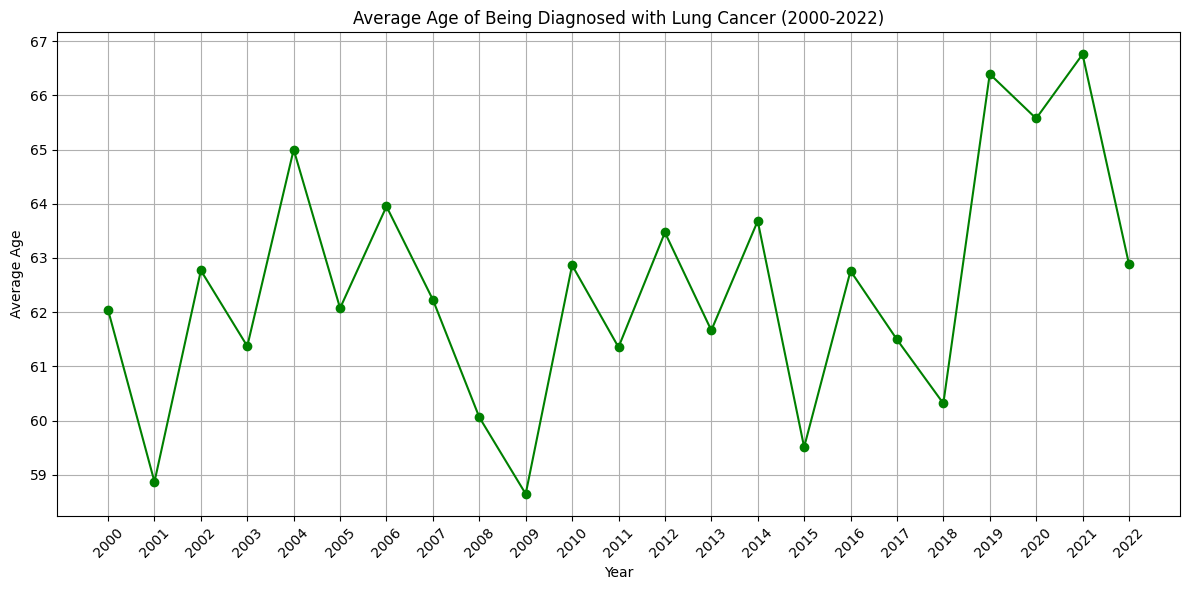

In [205]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(
    average_age_per_year.index,
    average_age_per_year,
    marker="o",
    linestyle="-",
    color="green",
)
plt.title("Average Age of Being Diagnosed with Lung Cancer (2000-2022)")
plt.xlabel("Year")
plt.ylabel("Average Age")
plt.grid(True)
plt.xticks(np.arange(2000, 2023), rotation=45)
plt.tight_layout()
plt.show()

Above or below poverty threshold

POORYN indicates whether family income was above or below poverty level. The poverty status of a family group is assigned to each member of the family, thus making POORYN a person-level variable. Poverty status is also calculated for adults who live alone or with persons they are not related to; in such cases, POORYN is calculated based on the individual's income

1-At or above poverty threshold

2-Below poverty threshold

9-Unk (1997+: incl. Undefined)

In [206]:
# find the unique years of the column "POORYN"
filtered_nhis_new = nhis_new[pd.notnull(nhis_new["POORYN"])]
unique_years = filtered_nhis_new["YEAR"].unique()
print(unique_years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]


In [207]:
nhis_new["POORYN"].unique()

array([ 1.,  9.,  2., nan])

In [208]:
# unique poverty level for people with known cancer status in the survey
unique_poverty_cancer_status = nhis_new.loc[
    nhis_new["CNLUNG"].isin([1, 2]), "POORYN"
].unique()

unique_poverty_cancer_status

array([ 9.,  1.,  2., nan])

Proportion of People with Lung Cancer by Poverty Level Over Years (2000-2018)

In [209]:
# Calculating the proportion of lung cancer cases by poverty level for each year
proportion_by_poverty_year = (
    lung_cancer_status.groupby(["YEAR", "POORYN"])["CNLUNG"]
    .apply(lambda x: (x == 2).mean())
    .unstack()
)

proportion_by_poverty_year

POORYN,1.0,2.0,9.0
YEAR,,,
2000,0.023639,0.018265,0.024436
2001,0.033243,0.039648,0.029412
2002,0.038381,0.042453,0.029900
2003,0.042825,0.060914,0.033389
2004,0.033113,0.033654,0.030100
2005,0.029376,0.018018,0.030631
2006,0.034091,0.029586,0.038835
2007,0.036237,0.056701,0.042705
2008,0.025036,0.028169,0.038298


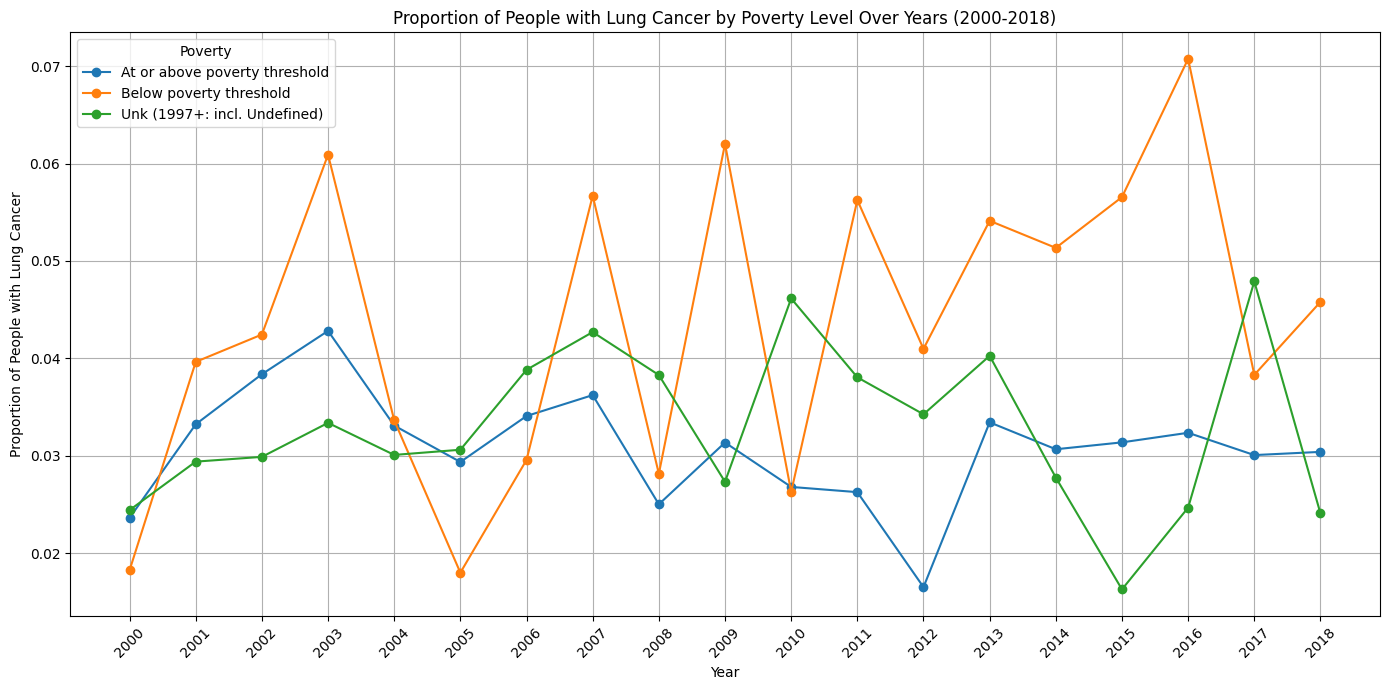

In [210]:
# Plotting
plt.figure(figsize=(14, 7))
poverty_labels = {
    1.0: "At or above poverty threshold",
    2.0: "Below poverty threshold",
    9.0: "Unk (1997+: incl. Undefined)",
}

for poverty in proportion_by_poverty_year.columns:
    label = poverty_labels.get(poverty)
    plt.plot(
        proportion_by_poverty_year.index,
        proportion_by_poverty_year[poverty],
        marker="o",
        linestyle="-",
        label=label,
    )

plt.title(
    "Proportion of People with Lung Cancer by Poverty Level Over Years (2000-2018)"
)
plt.xlabel("Year")
plt.ylabel("Proportion of People with Lung Cancer")
plt.legend(title="Poverty")
plt.grid(True)
plt.xticks(np.arange(2000, 2019), rotation=45)
plt.tight_layout()
plt.show()

Number of Lung Cancer Cases Each Year by Poverty (2000-2018)

In [211]:
# Count the number of lung cancer cases by YEAR and POVERTY
lung_cancer_count_by_year_poverty = (
    lung_cancer.groupby(["YEAR", "POORYN"]).size().unstack(fill_value=0)
)

lung_cancer_count_by_year_poverty

POORYN,1.0,2.0,9.0
YEAR,,,
2000,33,4,13
2001,49,9,18
2002,55,9,18
2003,57,12,20
2004,50,7,18
2005,48,4,17
2006,39,5,16
2007,47,11,12
2008,35,6,9


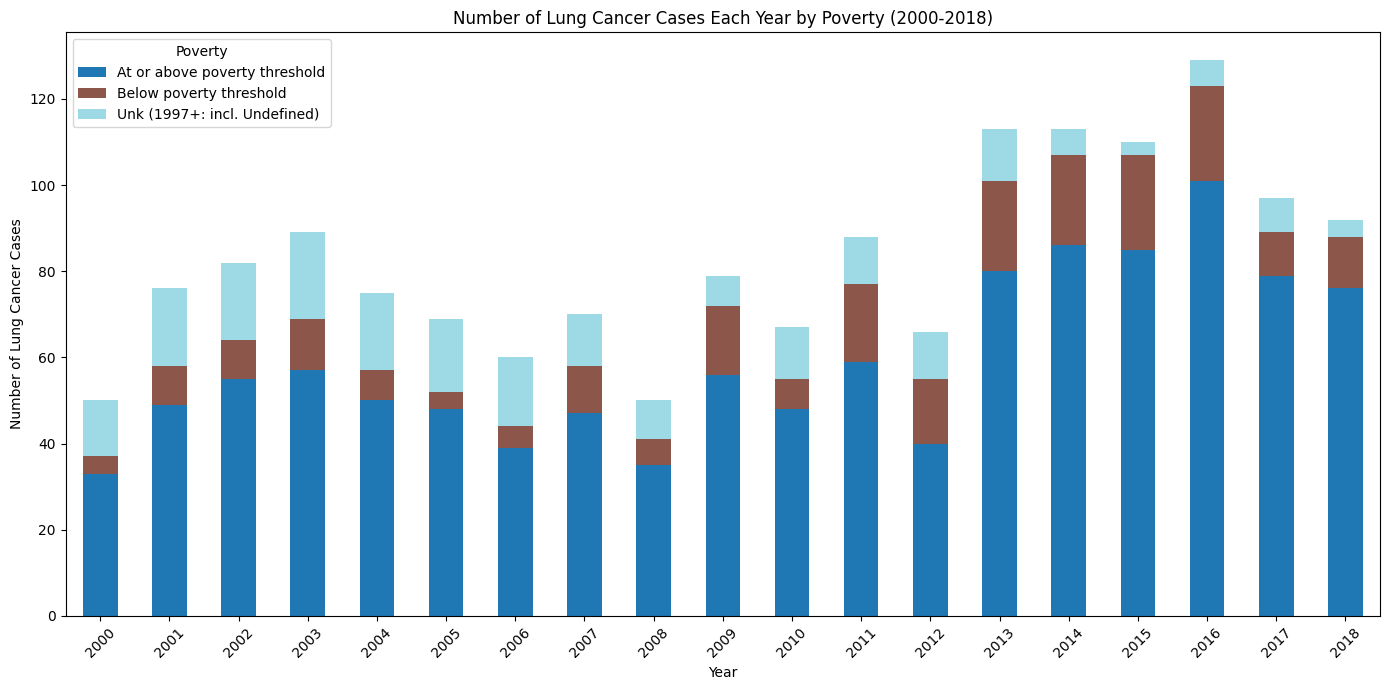

In [212]:
# Plotting
lung_cancer_count_by_year_poverty.plot(
    kind="bar", stacked=True, figsize=(14, 7), colormap="tab20"
)

plt.title("Number of Lung Cancer Cases Each Year by Poverty (2000-2018)")
plt.xlabel("Year")
plt.ylabel("Number of Lung Cancer Cases")

# legend labels
plt.legend(
    [
        poverty_labels.get(int(x), f"Race {x}")
        for x in lung_cancer_count_by_year_poverty.columns
    ],
    title="Poverty",
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Proportion of People In Poverty By Race Over the Year

In [213]:
# filter data for people live below poverty
below_poverty = nhis_new[nhis_new["POORYN"] == 2]

# Counting the number of people with poverty per year
below_poverty_counts_per_year = below_poverty.groupby("YEAR").size()

below_poverty_counts_per_year

YEAR
2000    11013
2001    10653
2002     9246
2003     9656
2004     9833
2005    10191
2006     8529
2007     9491
2008     9449
2009    13305
2010    14830
2011    16932
2012    17877
2013    16949
2014    18058
2015    15203
2016    12071
2017     8819
2018     7515
dtype: int64

In [214]:
# Counting total number of poeple who is known to be in poverty and who is not known to be in poverty
poverty_status = nhis_new[nhis_new["POORYN"].isin([1.0, 2.0])]

total_poverty_status_counts_per_year = poverty_status.groupby("YEAR").size()

In [215]:
# Calculating the proportion of lung cancer cases by poverty level for each year
proportion_by_race_poverty_year = (
    poverty_status.groupby(["YEAR", "RACENEW"])["POORYN"]
    .apply(lambda x: (x == 2.0).mean())
    .unstack()
)

proportion_by_race_poverty_year

RACENEW,100,200,300,400,520,530,541
YEAR,,,,,,,
2000,0.121071,0.255975,0.262156,0.136401,0.308055,NaN,0.181979
2001,0.120132,0.251099,0.287169,0.124512,0.263507,NaN,0.202723
2002,0.112427,0.244834,0.239609,0.146841,0.232829,NaN,0.194943
2003,0.135738,0.250206,0.216842,0.135188,NaN,0.144737,0.210811
2004,0.133119,0.236962,0.268116,0.106477,NaN,0.225806,0.149787
2005,0.127406,0.254978,0.243328,0.109179,NaN,0.068376,0.198840
2006,0.138173,0.277839,0.325581,0.126566,NaN,0.265823,0.203273
2007,0.126718,0.274001,0.336788,0.111049,NaN,0.192661,0.215670
2008,0.130207,0.255649,0.304709,0.111986,NaN,0.185185,0.165884


In [216]:
subset_proportion_by_race_poverty_year = proportion_by_race_poverty_year[
    [100, 200, 300, 400]
]

subset_proportion_by_race_poverty_year

RACENEW,100,200,300,400
YEAR,,,,
2000,0.121071,0.255975,0.262156,0.136401
2001,0.120132,0.251099,0.287169,0.124512
2002,0.112427,0.244834,0.239609,0.146841
2003,0.135738,0.250206,0.216842,0.135188
2004,0.133119,0.236962,0.268116,0.106477
2005,0.127406,0.254978,0.243328,0.109179
2006,0.138173,0.277839,0.325581,0.126566
2007,0.126718,0.274001,0.336788,0.111049
2008,0.130207,0.255649,0.304709,0.111986


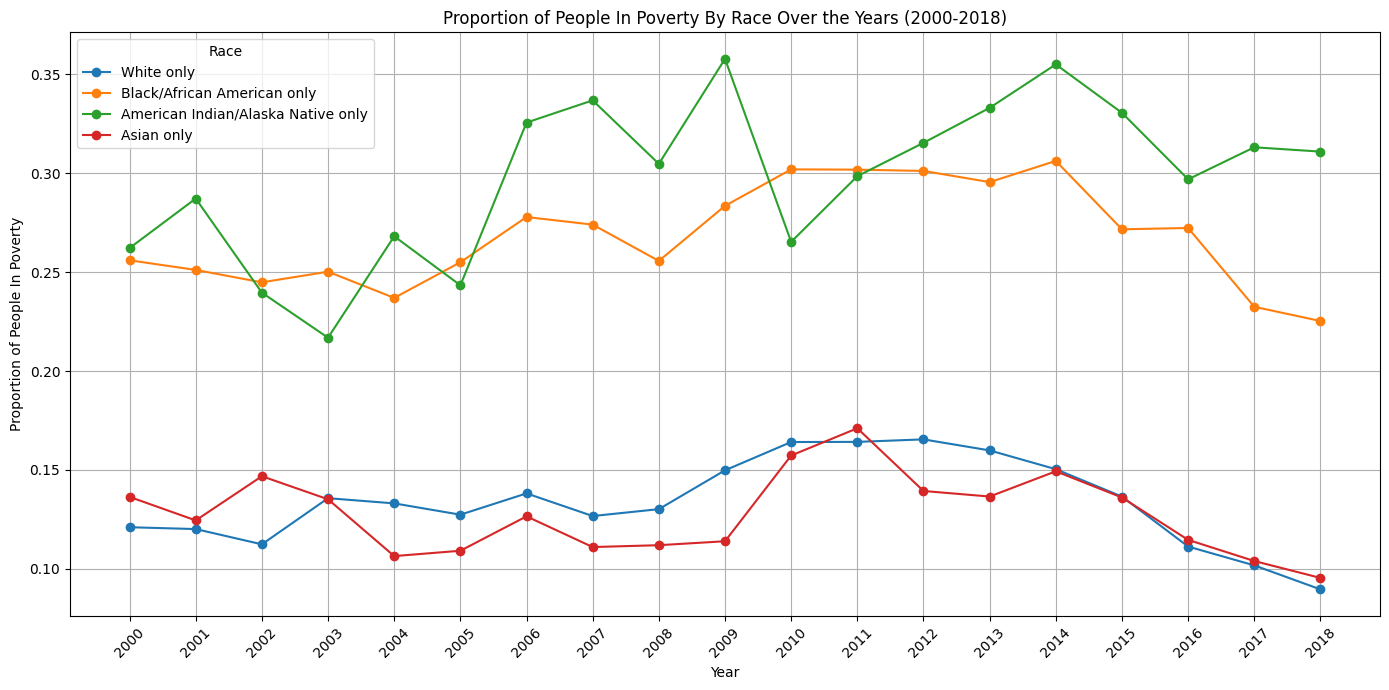

In [217]:
# Plotting
plt.figure(figsize=(14, 7))
race_labels = {
    100: "White only",
    200: "Black/African American only",
    300: "American Indian/Alaska Native only",
    400: "Asian only",
}

for race in subset_proportion_by_race_poverty_year.columns:
    label = race_labels.get(race)
    plt.plot(
        subset_proportion_by_race_poverty_year.index,
        subset_proportion_by_race_poverty_year[race],
        marker="o",
        linestyle="-",
        label=label,
    )

plt.title("Proportion of People In Poverty By Race Over the Years (2000-2018)")
plt.xlabel("Year")
plt.ylabel("Proportion of People In Poverty")
plt.legend(title="Race")
plt.grid(True)
plt.xticks(np.arange(2000, 2019), rotation=45)
plt.tight_layout()
plt.show()

Has usual place for medical care

For sample adults and sample children, USUALPL indicates whether individuals have a place (or more than one place) that they usually go when they are sick or need advice about their health. Please see the Universe tab for
changes to the universe prior to 1997.

The NIU code indicates that the person was not asked a direct question about the condition.

0 NIU

1 There is no place or No

2 Yes, has a usual place or Yes

3 There is more than one place

7 Unknown-refused

8 Unknown-not ascertained

9 Unknown-don't know

In [218]:
# find the unique years of the column "USUALPL"
filtered_nhis_new = nhis_new[pd.notnull(nhis_new["USUALPL"])]
unique_years = filtered_nhis_new["YEAR"].unique()
print(unique_years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [219]:
nhis_new["USUALPL"].unique()

array([0, 2, 1, 8, 3, 7, 9])

In [220]:
# unique poverty level for people with known cancer status in the survey
unique_place_cancer_status = nhis_new.loc[
    nhis_new["CNLUNG"].isin([1, 2]), "USUALPL"
].unique()

unique_place_cancer_status

array([2, 1, 3, 8, 7, 9])

Proportion of People with Lung Cancer by Access to Care Over Years (2000-2022)

In [221]:
# Calculating the proportion of lung cancer cases by access to care level for each year
proportion_by_place_year = (
    lung_cancer_status.groupby(["YEAR", "USUALPL"])["CNLUNG"]
    .apply(lambda x: (x == 2).mean())
    .unstack()
)

proportion_by_place_year

USUALPL,1,2,3,7,8,9
YEAR,,,,,,
2000,0.037037,0.022516,0.076923,0.000000,0.000000,NaN
2001,0.017391,0.033641,0.052632,0.000000,0.000000,0.0
2002,0.000000,0.037348,0.000000,NaN,0.222222,0.0
2003,0.010526,0.043825,0.000000,0.000000,0.000000,NaN
2004,0.008929,0.031944,0.166667,0.000000,0.000000,NaN
2005,0.000000,0.030088,0.000000,NaN,0.047619,NaN
2006,0.000000,0.035132,0.086957,0.333333,0.090909,NaN
2007,0.052083,0.038130,0.043478,NaN,0.074074,NaN
2008,0.010417,0.026502,0.130435,NaN,0.034483,NaN


In [222]:
# subset by only keeing 1, 2,3
subset_proportion_by_place_year = proportion_by_place_year[[1, 2, 3]]

subset_proportion_by_place_year

USUALPL,1,2,3
YEAR,,,
2000,0.037037,0.022516,0.076923
2001,0.017391,0.033641,0.052632
2002,0.000000,0.037348,0.000000
2003,0.010526,0.043825,0.000000
2004,0.008929,0.031944,0.166667
2005,0.000000,0.030088,0.000000
2006,0.000000,0.035132,0.086957
2007,0.052083,0.038130,0.043478
2008,0.010417,0.026502,0.130435


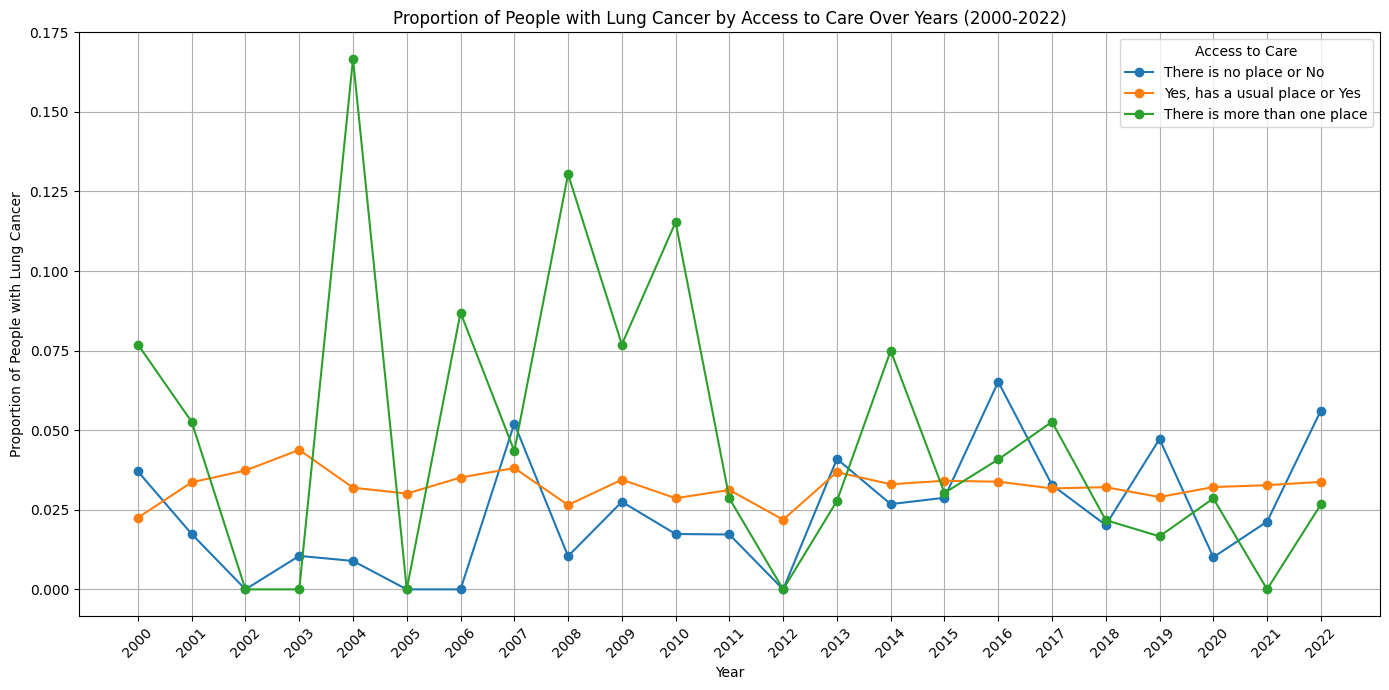

In [223]:
# Plotting
plt.figure(figsize=(14, 7))
place_labels = {
    1: "There is no place or No",
    2: "Yes, has a usual place or Yes",
    3: "There is more than one place",
}

for place in subset_proportion_by_place_year.columns:
    label = place_labels.get(place)
    plt.plot(
        subset_proportion_by_place_year.index,
        subset_proportion_by_place_year[place],
        marker="o",
        linestyle="-",
        label=label,
    )

plt.title(
    "Proportion of People with Lung Cancer by Access to Care Over Years (2000-2022)"
)
plt.xlabel("Year")
plt.ylabel("Proportion of People with Lung Cancer")
plt.legend(title="Access to Care")
plt.grid(True)
plt.xticks(np.arange(2000, 2023), rotation=45)
plt.tight_layout()
plt.show()

Health Insurance coverage status

For sample adults and sample children, HINOTCOVE indicates whether the person currently lacks health insurance coverage. Prior to 2019, this variable is available for all persons.

HINOTCOVE is a recoded variable created by the National Center for Health Statistics (NCHS) and included in the original NHIS public use data. HINOTCOVE, like other recoded health insurance variables in these data, is based on
responses to a series of questions and on back editing carried out by NCHS staff. For the 1997 sample only, HINOTCOVE is constructed by IPUMS NHIS staff using back edited variables from the original NHIS public use data. The
component variables used by IPUMS NHIS staff are available in IPUMS NHIS as HIPRIVATEE, HIMILITE, HIMCAIDE, HIMCAREE, HICHIPE, HISTATEE, and HIOTHGOVE

0 NIU

1 No, has coverage

2 Yes, has no coverage

7 Unknown-refused

8 Unknown-not ascertained

9 Unknown-don't know

In [224]:
# find the unique years of the column "HINOTCOVE"
filtered_nhis_new = nhis_new[pd.notnull(nhis_new["HINOTCOVE"])]
unique_years = filtered_nhis_new["YEAR"].unique()
print(unique_years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [225]:
nhis_new["HINOTCOVE"].unique()

array([1, 2, 9])

In [226]:
# unique poverty level for people with known cancer status in the survey
unique_insurance_cancer_status = nhis_new.loc[
    nhis_new["CNLUNG"].isin([1, 2]), "HINOTCOVE"
].unique()

unique_insurance_cancer_status

array([1, 2, 9])

Proportion of People with Lung Cancer by Health Insurance Coverage Over Years (2000-2022)

In [227]:
# Calculating the proportion of lung cancer cases by insurance for each year
proportion_by_insurance_year = (
    lung_cancer_status.groupby(["YEAR", "HINOTCOVE"])["CNLUNG"]
    .apply(lambda x: (x == 2).mean())
    .unstack()
)

proportion_by_insurance_year

HINOTCOVE,1,2,9
YEAR,,,
2000,0.024150,0.008850,0.000000
2001,0.033672,0.020979,0.000000
2002,0.039010,0.000000,0.000000
2003,0.041772,0.043478,0.000000
2004,0.033517,0.014815,0.000000
2005,0.030142,0.006579,0.000000
2006,0.036285,0.010417,0.000000
2007,0.039640,0.038095,0.000000
2008,0.027539,0.020202,0.000000


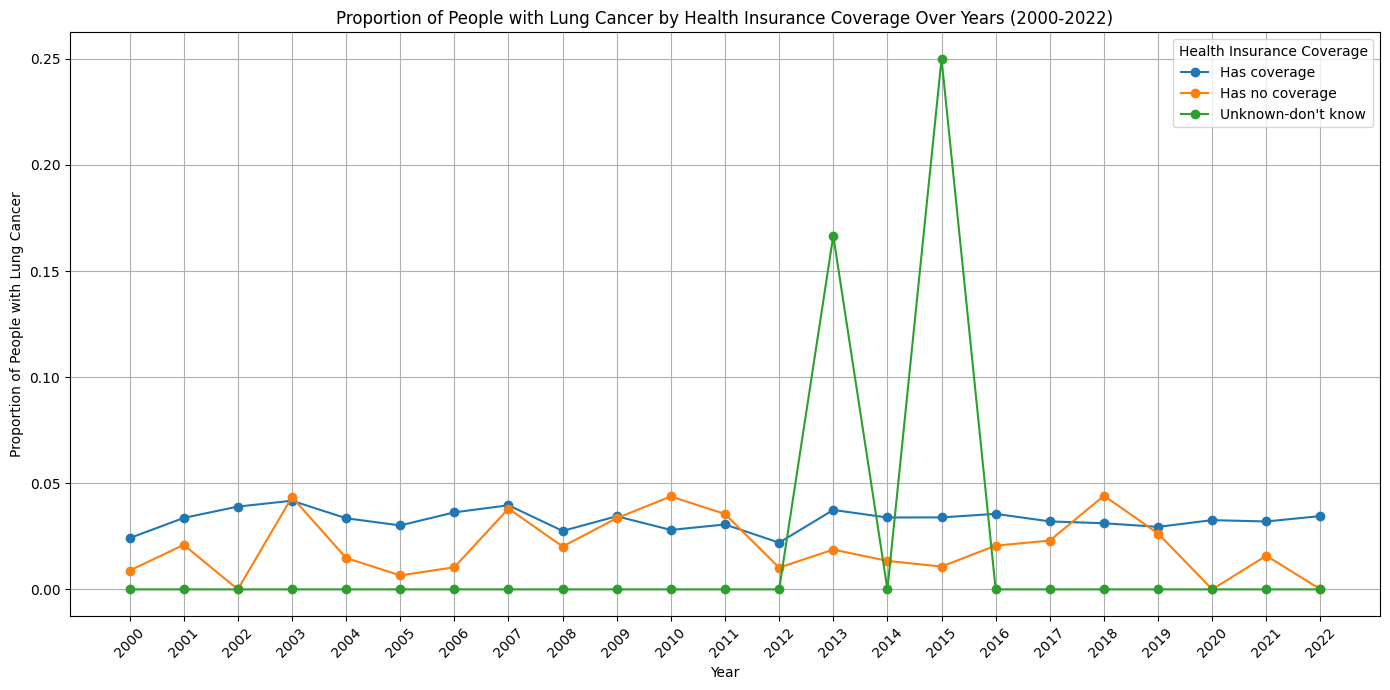

In [228]:
# Plotting
plt.figure(figsize=(14, 7))
insurance_labels = {
    1: "Has coverage",
    2: "Has no coverage",
    9: "Unknown-don't know",
}

for insurance in proportion_by_insurance_year.columns:
    label = insurance_labels.get(insurance)
    plt.plot(
        proportion_by_insurance_year.index,
        proportion_by_insurance_year[insurance],
        marker="o",
        linestyle="-",
        label=label,
    )

plt.title(
    "Proportion of People with Lung Cancer by Health Insurance Coverage Over Years (2000-2022)"
)
plt.xlabel("Year")
plt.ylabel("Proportion of People with Lung Cancer")
plt.legend(title="Health Insurance Coverage")
plt.grid(True)
plt.xticks(np.arange(2000, 2023), rotation=45)
plt.tight_layout()
plt.show()